In [ ]:
# regression task
# about housing data set

#import the libraries
import numpy as np
import pandas as pd


In [ ]:
# load the data
url = "https://raw.githubusercontent.com/ziafaq/genai/refs/heads/main/housing.csv"

df = pd.read_csv(url)
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [ ]:
df_copy = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# fill missing value
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['ocean_proximity'].nunique()

5

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'],dtype='int')
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(20640, 14) (16512, 13) (4128, 13) (16512,) (4128,)


In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X.columns)

print(X_train_scaled.head(1))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.272587 -1.372811             0.34849     0.222569        0.211228   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0    0.768276    0.322906      -0.326196                  -0.894683   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0               -0.680574               -0.015566                 -0.355646   

   ocean_proximity_NEAR OCEAN  
0                    2.629758  


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train_scaled,y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
results = pd.DataFrame(columns=['Model','MSE','R2','Params'])
results

,Model,MSE,R2,Params


In [ ]:
def record_results(model,params):
  y_pred = model.predict(X_test_scaled)

  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  print('performance res')
  print('MSE:',mse)
  print('R2 :',r2)

  results.loc[len(results)] = {'Model': model, 'MSE': mse, 'R2': r2, 'Params': params}


In [ ]:
paraminf = "scaled"
record_results(lr_model,paraminf)
display(results)

performance res
MSE: 4908476721.156616
R2 : 0.6254240620553606


,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
X_train_scaled.shape

(16512, 13)

In [ ]:
#build model
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))

model.add(Dense(16))

model.add(Dense(8))

model.add(Dense(1))#, activation='linear')

#compile the model
model.compile(loss='mean_squared_error',
    metrics=['mse'])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
1 ip = 13
1 hd = 16
1 hd = 8
1 op = 1

13cols x 16ne + 16b = 208 + 16 = 224
16p.neu x 8ne + 8b  = 128 + 8 = 136
8p.ne x 1ne + 1b = 8 + 1 = 9
224+136+9 = 369

'''

In [ ]:
!pip install keras_visualizer

In [ ]:
import keras_visualizer

In [ ]:
keras_visualizer.visualizer(model,file_name='mygraph1',file_format='png')

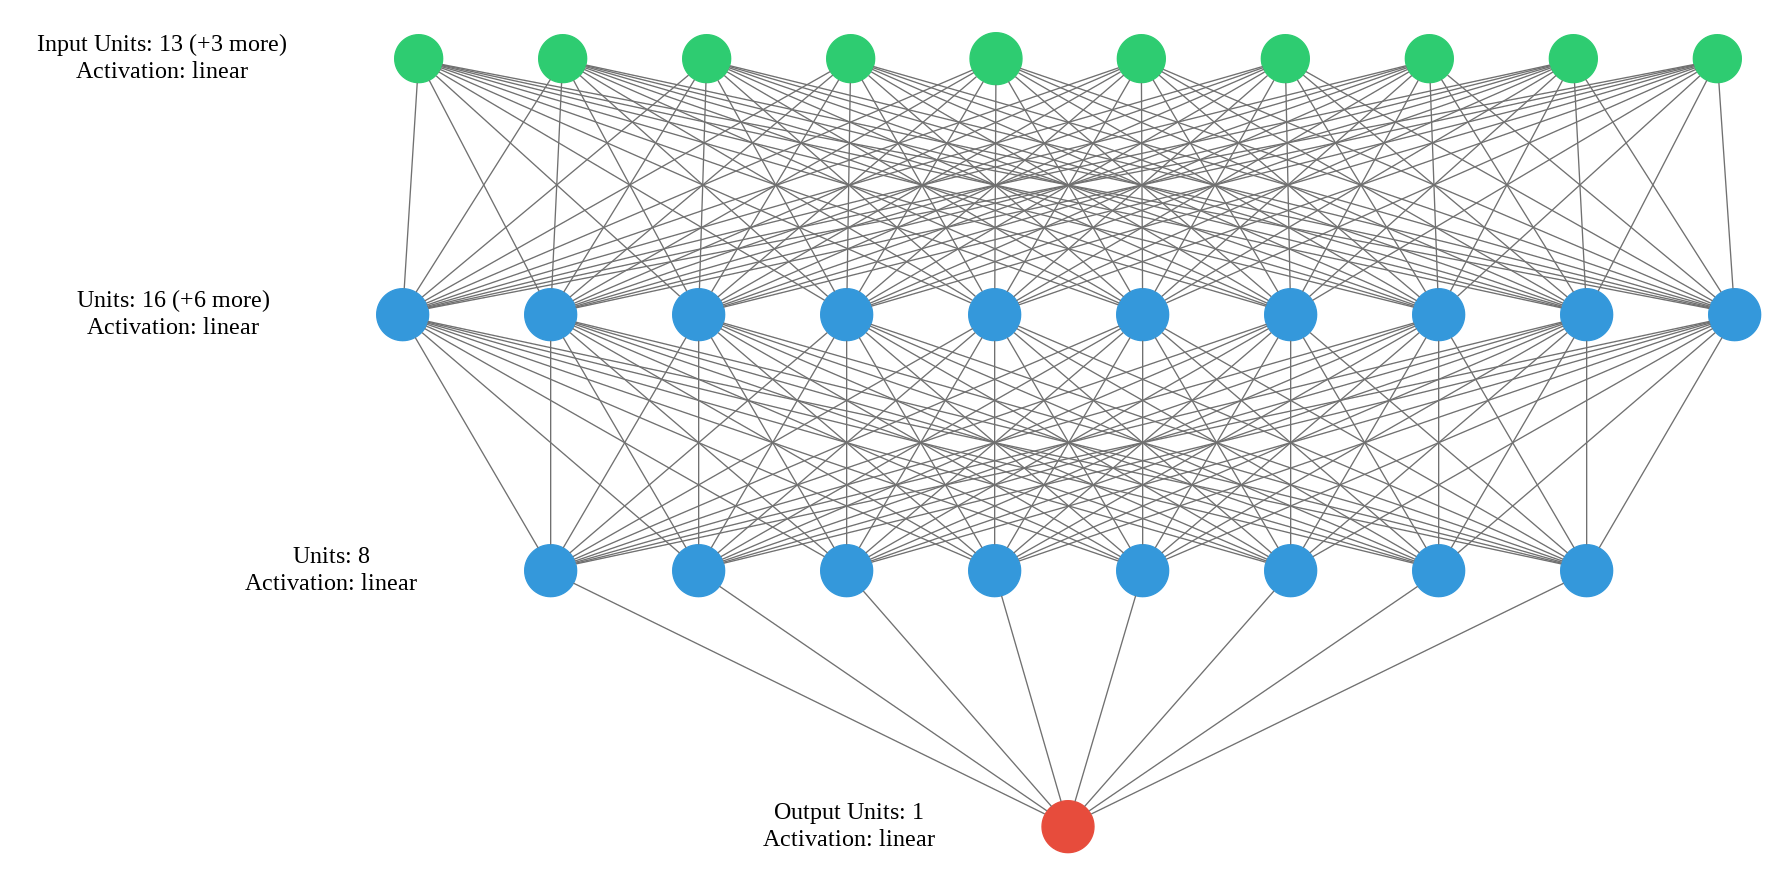

In [ ]:
from IPython.display import Image, display

display(Image('mygraph1.png'))

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=1000000000, patience=2)

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1, callbacks=[early_stopping]
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56872599552.0000 - mse: 56872599552.0000 - val_loss: 56856698880.0000 - val_mse: 56856698880.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56640028672.0000 - mse: 56640028672.0000 - val_loss: 56787103744.0000 - val_mse: 56787103744.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55258361856.0000 - mse: 55258361856.0000 - val_loss: 56627507200.0000 - val_mse: 56627507200.0000


In [ ]:
# Train the model
history = model.fit(
    X_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56276860928.0000 - mse: 56276860928.0000 - val_loss: 56344604672.0000 - val_mse: 56344604672.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54608809984.0000 - mse: 54608809984.0000 - val_loss: 55902633984.0000 - val_mse: 55902633984.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54844968960.0000 - mse: 54844968960.0000 - val_loss: 55279136768.0000 - val_mse: 55279136768.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55329030144.0000 - mse: 55329030144.0000 - val_loss: 54443835392.0000 - val_mse: 54443835392.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53352869888.0000 - mse: 53352869888.0000 - val_loss: 53383446528.0000 - val_mse: 53383446528.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52755025920.0000 - mse: 52755025920.0000 - val_loss: 52079968256.0000 - val_mse: 52079968256.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
  plt.plot(history.history['loss'], label='train Loss')
  plt.plot(history.history['val_loss'], label='val Loss')

  plt.xlabel('epoch')
  plt.ylabel('loss')

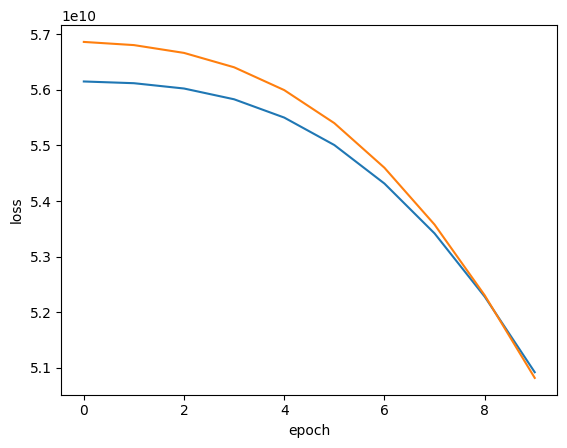

In [ ]:
plot_loss_curve(history)

In [ ]:
paraminf = "13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
record_results(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
performance res
MSE: 49498185519.00414
R2 : -2.777308179424318


,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled
1,"<Sequential name=sequential, built=True>",4.949819e+10,-2.777308,"13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"


In [ ]:
X_train_scaled.shape[0]

16512

In [ ]:
X_train_scaled.shape[1]

13

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56129630208.0000 - mse: 56129630208.0000 - val_loss: 56862400512.0000 - val_mse: 56862400512.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56307040256.0000 - mse: 56307040256.0000 - val_loss: 56815489024.0000 - val_mse: 56815489024.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56250015744.0000 - mse: 56250015744.0000 - val_loss: 56702861312.0000 - val_mse: 56702861312.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56427679744.0000 - mse: 56427679744.0000 - val_loss: 56494985216.0000 - val_mse: 56494985216.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56321196032.0000 - mse: 56321196032.0000 - val_loss: 56152023040.0000 - val_mse: 56152023040.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55404158976.0000 - mse: 55404158976.0000 - val_loss: 55640276992.0000 - val_mse: 55640276992.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

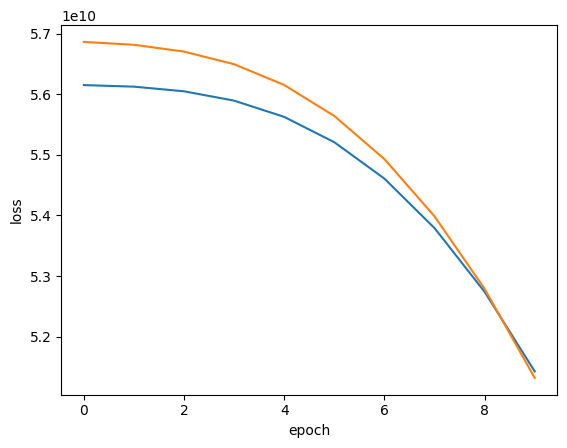

In [ ]:
#build model
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))
#model.add(Input(shape=(13,)))
model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    X_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plot_loss_curve(history)

In [ ]:
paraminf = "13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 10-ep, 32-bs"
record_results(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
performance res
MSE: 49880884113.27407
R2 : -2.806512695008733


,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled
1,"<Sequential name=sequential, built=True>",4.949819e+10,-2.777308,"13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
2,"<Sequential name=sequential_2, built=True>",4.988088e+10,-2.806513,"13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 1..."


In [ ]:
from keras.optimizers import Adam

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56270516224.0000 - mse: 56270516224.0000 - val_loss: 56302915584.0000 - val_mse: 56302915584.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54487904256.0000 - mse: 54487904256.0000 - val_loss: 52222083072.0000 - val_mse: 52222083072.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49838792704.0000 - mse: 49838792704.0000 - val_loss: 43248742400.0000 - val_mse: 43248742400.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40040095744.0000 - mse: 40040095744.0000 - val_loss: 31040448512.0000 - val_mse: 31040448512.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27463141376.0000 - mse: 27463141376.0000 - val_loss: 20142981120.0000 - val_mse: 20142981120.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 17942347776.0000 - mse: 17942347776.0000 - val_loss: 13556022272.0000 - val_mse: 13556022272.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

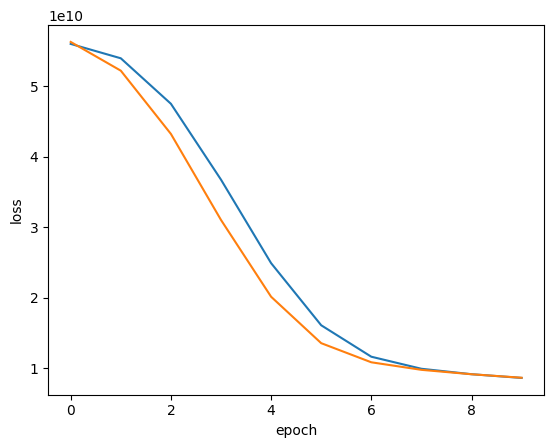

In [ ]:
#build model
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    X_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plot_loss_curve(history)

In [ ]:
paraminf = "13-ip, 64-n, 32-n, act-relu, opt-adam, lss-mse met-mse, 10-ep, 32-bs"
record_results(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
performance res
MSE: 8495096704.982034
R2 : 0.3517217261143999


,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled
1,"<Sequential name=sequential, built=True>",4.949819e+10,-2.777308,"13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
2,"<Sequential name=sequential_2, built=True>",4.988088e+10,-2.806513,"13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 1..."
3,"<Sequential name=sequential_4, built=True>",8.495097e+09,0.351722,"13-ip, 64-n, 32-n, act-relu, opt-adam, lss-mse..."


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 43990867968.0000 - mse: 43990867968.0000 - val_loss: 8393373184.0000 - val_mse: 8393373184.0000
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7094762496.0000 - mse: 7094762496.0000 - val_loss: 5707332608.0000 - val_mse: 5707332608.0000
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5283205632.0000 - mse: 5283205632.0000 - val_loss: 5072331776.0000 - val_mse: 5072331776.0000
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4826941440.0000 - mse: 4826941440.0000 - val_loss: 4870478848.0000 - val_mse: 4870478848.0000
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4517920768.0000 - mse: 4517920768.0000 - val_loss: 4775488512.0000 - val_mse: 4775488512.0000
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4579168256.0000 - mse: 4579168256.0000 - val_loss: 4713474560.0000 - val_mse: 4713474560.0000
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 428900249

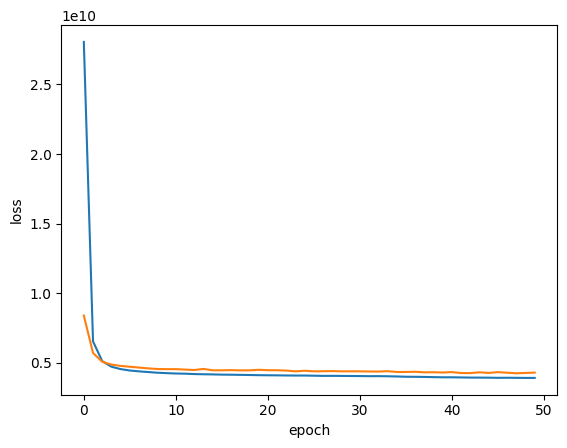

In [ ]:
#build model
model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    X_train_scaled,y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plot_loss_curve(history)

In [ ]:
X_train_scaled.shape[0]*0.8/32*50*64

1320960.0

In [ ]:
paraminf = "13-ip, 64-n, 32-n, act-relu, opt-adam-lr0.01, lss-mse met-mse, 50-ep, 32-bs"
record_results(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
performance res
MSE: 4127183279.364575
R2 : 0.6850461689521596


,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled
1,"<Sequential name=sequential, built=True>",4.949819e+10,-2.777308,"13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
2,"<Sequential name=sequential_2, built=True>",4.988088e+10,-2.806513,"13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 1..."
3,"<Sequential name=sequential_4, built=True>",8.495097e+09,0.351722,"13-ip, 64-n, 32-n, act-relu, opt-adam, lss-mse..."
4,"<Sequential name=sequential_5, built=True>",4.127183e+09,0.685046,"13-ip, 64-n, 32-n, act-relu, opt-adam-lr0.01, ..."


In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
display(results)

,Model,MSE,R2,Params
0,LinearRegression(),4.908477e+09,0.625424,scaled
1,"<Sequential name=sequential, built=True>",4.949819e+10,-2.777308,"13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
2,"<Sequential name=sequential_2, built=True>",4.988088e+10,-2.806513,"13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 10-ep, 32-bs"
3,"<Sequential name=sequential_4, built=True>",8.495097e+09,0.351722,"13-ip, 64-n, 32-n, act-relu, opt-adam, lss-mse met-mse, 10-ep, 32-bs"
4,"<Sequential name=sequential_5, built=True>",4.127183e+09,0.685046,"13-ip, 64-n, 32-n, act-relu, opt-adam-lr0.01, lss-mse met-mse, 50-ep, 32-bs"
